In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns


In [2]:
LOW_QUANTILE = 0.25
HIGH_QUANTILE = 0.2501

# Create a Folder to Store the Results
import os

if not os.path.exists("Results" + "_" + str(LOW_QUANTILE) + "_" + str(HIGH_QUANTILE)):
    os.mkdir("Results" + "_" + str(LOW_QUANTILE) + "_" + str(HIGH_QUANTILE))
    
save_path = "Results" + "_" + str(LOW_QUANTILE) + "_" + str(HIGH_QUANTILE) + "/"

## Data

### mRNA Expression Data

In [6]:
mRNA_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Depmap Melanoma mRNA.csv")
mRNA_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
full_mRNA_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Depmap Pancancer mRNA.csv")
full_mRNA_df.drop(['Unnamed: 0'], axis=1, inplace=True)

### Gene Dependency Data

In [24]:
# SWAP THIS TO RUN WITH GENE EFFECT
dependency_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Depmap Melanoma Gene Effect.csv")
dependency_df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(dependency_df.shape)

(60, 17454)


### Cell Lines Data

In [25]:
cell_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Depmap Melanoma Cells.csv")
cell_df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(cell_df.shape)

(60, 5)


### Chromatin Modifying Genes

In [26]:
chromatin_genes_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Chromatin Genes.csv")
chromatin_genes_df.head(5)

,Gene
0,ACTB
1,ACTL6A
2,ACTL6B
3,AKAP8
4,AKAP8L


## Analysis

### Validating Assumptions / mRNA Quartiles

#### Normality Test (Shapiro-Wilk Test) for mRNA Expression and Gene Dependency

In [ ]:
# Shapiro-Wilk Test for Normality for All Genes in Gene mRNA Expression Data
# Interpretation: p-value < 0.05, therefore  mRNA data is not normally distributed
results = []
for gene in mRNA_df.columns[1:]:
    results.append((gene,stats.shapiro(mRNA_df[gene])[0],stats.shapiro(mRNA_df[gene])[1]))
    
shapiro_df = pd.DataFrame(results, columns=['Gene','W-Stat','p-value'])
print(shapiro_df.shape)
print(mRNA_df.shape)
print('number of genes that are normally distributed: ', len(shapiro_df[shapiro_df['p-value'] > 0.05]))
    

c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


(19193, 3)
(60, 19194)
number of genes that are normally distributed:  7925


In [ ]:
# Shapiro-Wilk Test for Normality for All Genes in Gene Dependency Data
# Interpretation: p-value < 0.05, therefore  dependency data is not normally distributed

results = []
for gene in dependency_df.columns[1:]:
    results.append((gene,stats.shapiro(dependency_df[gene])[0],stats.shapiro(dependency_df[gene])[1]))
    
shapiro_df = pd.DataFrame(results, columns=['Gene','W-Stat','p-value'])
print(shapiro_df.shape)
print(dependency_df.shape)
print('number of genes that are normally distributed: ', len(shapiro_df[shapiro_df['p-value'] > 0.05]))

(17453, 3)
(60, 17454)
number of genes that are normally distributed:  12279


#### mRNA Quartiles (Pancancer mRNA & Melanoma mRNA)

##### Chromatin mRNA Subset

In [ ]:
mRNA_genes = mRNA_df.columns[1:].tolist()
chromatin_genes = chromatin_genes_df['Gene'].tolist()
intersection = list(set(chromatin_genes).intersection(mRNA_genes))

chromatin_vip_df = mRNA_df[intersection]

print(chromatin_vip_df.shape)
print(len(chromatin_genes))

chromatin_genes_quantiles = chromatin_vip_df.quantile([LOW_QUANTILE, HIGH_QUANTILE])

# Save
chromatin_genes_quantiles.to_csv(save_path + 'Chromatin Genes Quantiles.csv')

chromatin_genes_quantiles.head(5)

(60, 497)
499


,DOT1L,HDAC7,SNCA,PAX7,ATF2,KDM2B,ZBTB4,KMT2B,RIF1,PADI4,...,SNW1,SIRT2,MBD3,BRPF3,SFPQ,MTA2,BRD8,KDM5C,PRDM6,SUDS3
0.2500,2.563683,3.525316,5.541085,0.0,3.856475,3.504882,3.356823,3.735488,3.339786,0.0,...,5.737819,4.620057,4.188721,3.377813,7.650074,5.499444,5.097186,4.700716,0.014355,3.636025
0.2501,2.564859,3.525804,5.541164,0.0,3.856558,3.505056,3.356939,3.736046,3.339972,0.0,...,5.737860,4.620414,4.188970,3.377863,7.650142,5.499484,5.097226,4.700736,0.014355,3.636128


In [ ]:
full_mRNA_genes = full_mRNA_df.columns[1:].tolist()
chromatin_genes = chromatin_genes_df['Gene'].tolist()
intersection = list(set(chromatin_genes).intersection(full_mRNA_genes))

chromatin_vip_df = full_mRNA_df[intersection]

print(chromatin_vip_df.shape)
print(len(chromatin_genes))

full_chromatin_genes_quantiles = chromatin_vip_df.quantile([LOW_QUANTILE, HIGH_QUANTILE])

# Save
full_chromatin_genes_quantiles.to_csv(save_path + 'Chromatin Genes Quantiles.csv')

full_chromatin_genes_quantiles.head(5)

(1407, 497)
499


,DOT1L,HDAC7,SNCA,PAX7,ATF2,KDM2B,ZBTB4,KMT2B,RIF1,PADI4,...,SNW1,SIRT2,MBD3,BRPF3,SFPQ,MTA2,BRD8,KDM5C,PRDM6,SUDS3
0.2500,2.670160,4.305241,0.163499,0.0,3.797013,3.487998,2.981853,3.904964,3.226508,0.0,...,5.697245,4.277611,4.665618,3.391630,7.641654,5.733490,5.236298,4.568335,0.028569,3.887038
0.2501,2.670479,4.305446,0.163499,0.0,3.797013,3.488722,2.981853,3.905506,3.226941,0.0,...,5.697441,4.278343,4.666258,3.391823,7.641746,5.733528,5.237106,4.568763,0.028569,3.887175


### T-Tests Between mRNA Quartiles

#### Chromatin mRNA Quartile T-Tests

In [ ]:
results = []
chromatin_gene_groups = pd.DataFrame()

for gene in intersection:
    # Index by gene column and then quantile row index
    low_expression = full_chromatin_genes_quantiles[gene][LOW_QUANTILE]
    
    # Testing for > 25th percentile or < 75th percentile
    high_expression = full_chromatin_genes_quantiles[gene][HIGH_QUANTILE]
    
    # Create a filter and then index by the gene column
    low_expression_cells = mRNA_df[mRNA_df[gene] <= low_expression][['Cell Line',gene]]
    high_expression_cells = mRNA_df[mRNA_df[gene] > high_expression][['Cell Line',gene]]
    
    # T-Test of Gene mRNA Levels in Low and High Expression Cells
    ttest = stats.ttest_ind(low_expression_cells[gene], high_expression_cells[gene],  alternative = 'two-sided')
    
    # Append the results to the results list
    # Format: (Gene, Low Samples, Low Expression Mean, High Samples High Expression Mean, T-Stat, P-Value)
    results.append((gene, len(low_expression_cells), low_expression_cells[gene].mean(), len(high_expression_cells), high_expression_cells[gene].mean(), ttest[0], ttest[1]))
    
    # Add a column to the low expression cells called "Group" and assign it the value "low"
    low_expression_cells['Group'] = 'low'
    high_expression_cells['Group'] = 'high'
    
    # Sort the cells by cell line so that they are in the same order as the gene_groups dataframe
    expression = pd.concat([low_expression_cells, high_expression_cells])
    expression.sort_values(by=['Cell Line'], inplace=True)
    
    # Append the low and high expression cells to the gene_groups list
    chromatin_gene_groups = pd.concat([chromatin_gene_groups, expression['Group']], axis=1)
    chromatin_gene_groups.rename(columns={'Group': gene}, inplace=True)
    
    
    
chromatin_ttest_df = pd.DataFrame(results, columns=['Gene','Low Samples','Low Expression Mean','High Samples','High Expression Mean','T-Stat','P-Value'])
print(chromatin_ttest_df.shape)
print("Number of Genes with Significant Difference in Expression: ", len(chromatin_ttest_df[chromatin_ttest_df['P-Value'] < 0.05]))
chromatin_ttest_df.sort_values(by=['Gene'], inplace=True)
chromatin_ttest_df.reset_index(inplace=True, drop=True)
chromatin_ttest_df.head(5)
    


C:\Users\commo\AppData\Local\Temp\ipykernel_5848\1438953376.py:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest = stats.ttest_ind(low_expression_cells[gene], high_expression_cells[gene],  alternative = 'two-sided')
c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\commo\AppData\Local\Temp\ipykernel_5848\1438953376.py:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are n

(497, 7)
Number of Genes with Significant Difference in Expression:  477


,Gene,Low Samples,Low Expression Mean,High Samples,High Expression Mean,T-Stat,P-Value
0,ACTB,11,10.226403,49,11.423287,-7.904947,8.840257e-11
1,ACTL6A,14,5.845904,46,6.641840,-8.386721,1.381511e-11
2,ACTL6B,38,0.000000,22,0.073478,-7.447522,5.186230e-10
3,AKAP8,16,3.271682,44,4.216670,-11.469281,1.514713e-16
4,AKAP8L,17,4.570931,43,5.210672,-8.111976,3.976650e-11


In [ ]:
# Write to CSV
chromatin_ttest_df.sort_values(by=['Low Samples','High Samples'], ascending=[False,True], inplace=True)
chromatin_ttest_df.reset_index(drop=True, inplace=True)
chromatin_ttest_df.to_csv(save_path + 'M mRNA T-Test Results( less ' + str(LOW_QUANTILE) + ' greater ' + str(HIGH_QUANTILE) + ' ).csv')

### T-Tests for Chronos Scores by mRNA Groups

#### Optional Filter

In [ ]:
FILTERED = 1

# Filter the groups by ones with both low and high sample sizes > 10
chromatin_ttest_df_genes_filter = chromatin_ttest_df[(chromatin_ttest_df['Low Samples'] > 10) & (chromatin_ttest_df['High Samples'] > 10)]

# Retrieve the Genes
chromatin_ttest_df_genes_filter = chromatin_ttest_df_genes_filter ['Gene']

# Filter the gene groups by the filtered genes
chromatin_gene_groups_filtered = chromatin_gene_groups[chromatin_ttest_df_genes_filter]

# VALIDATION OF GENE GROUPS LOW SAMPLES KNOCKOUT
validated = []
for gene in chromatin_gene_groups_filtered.columns:
    # Cell Lines
    low_expression_genes = chromatin_gene_groups[gene][chromatin_gene_groups[gene] == 'low']
    
    # Filter the dependency dataframe by the cell lines
    low_expression_dependency = dependency_df.iloc[low_expression_genes.index]
    
    # Print the Mean Dependency Score
    print(gene, 'Low Expression Dependency Score Mean: ', low_expression_dependency[gene].mean())
    
    if low_expression_dependency[gene].mean() >= 0:
        validated.append(gene)
    else:
        continue
    
print('Number of Validated Genes: ', len(validated))
chromatin_gene_groups_filtered = chromatin_gene_groups_filtered[validated]
    





BRDT Low Expression Dependency Score Mean:  0.018428066084516883
MYOD1 Low Expression Dependency Score Mean:  -0.06563542143415646
NOS1 Low Expression Dependency Score Mean:  -0.08896963337432096
TNP1 Low Expression Dependency Score Mean:  -0.013002874776233157
PAX7 Low Expression Dependency Score Mean:  0.006784246152266934
PRKD2 Low Expression Dependency Score Mean:  -0.012500607376281309
TRERF1 Low Expression Dependency Score Mean:  -0.03525663637348167
ACTL6B Low Expression Dependency Score Mean:  0.038281964226453004
HDAC7 Low Expression Dependency Score Mean:  -0.1080280080361931
KDM2A Low Expression Dependency Score Mean:  -0.5783729452724083
PADI4 Low Expression Dependency Score Mean:  0.05847696430301263
TCF3 Low Expression Dependency Score Mean:  -0.027394499625974823
CHD5 Low Expression Dependency Score Mean:  0.006739975510899252
PER2 Low Expression Dependency Score Mean:  -0.16868148738170158
BRD3 Low Expression Dependency Score Mean:  0.0786100819148869
DPPA2 Low Expressi

#### T-Tests

In [ ]:
if FILTERED:
    print('Filtered')
    chromatin_gene_groups = chromatin_gene_groups_filtered
    
gene_groups = chromatin_gene_groups

gene_groups = gene_groups.reindex(sorted(gene_groups.columns), axis=1)
print(gene_groups.shape)
gene_groups.head(5)

Filtered
(60, 73)


,ACTL6B,ARID4A,ATF2,ATG5,AUTS2,BAZ2B,BRD3,BRD9,BRDT,BRWD3,...,SETD4,SETMAR,SIRT6,SMYD3,SUV39H1,TBL1X,TET2,UBE2B,ZBTB33,ZBTB7C
0,low,high,high,high,high,high,low,high,low,low,...,high,high,high,high,high,high,high,high,high,low
1,low,low,low,low,low,high,high,high,low,high,...,high,high,high,high,high,high,high,high,high,low
2,low,low,low,low,low,high,high,high,low,high,...,low,high,high,high,high,high,low,high,high,low
3,low,low,high,high,high,high,low,low,low,high,...,low,high,high,high,high,high,low,high,high,high
4,low,low,low,low,low,low,high,high,low,high,...,low,high,high,high,low,high,low,low,high,low


In [ ]:
# Concatenate the vip genes dataframes
vip_genes = pd.Series(list(gene_groups.columns))
vip_genes.sort_values(inplace=True)
vip_genes.reset_index(drop=True, inplace=True)
print(vip_genes.shape)
vip_genes.head(5)

(73,)


0    ACTL6B
1    ARID4A
2      ATF2
3      ATG5
4     AUTS2
dtype: object

##### Left-Sided T-Test

In [ ]:
 # Create a Matrix of Gene x Gene
gene_effect_matrix = np.zeros((gene_groups.shape[1], gene_groups.shape[1])) 
print(gene_effect_matrix.shape)

# Iterate through the genes
# For each gene, grab the low and high expression cell lines from the gene_groups dataframe
# Iterate through the other expression cell lines and then grab the gene dependency values
# from depdenency_df, index by the index of the cell line
for gene in vip_genes:
    low_expression = gene_groups[gene_groups[gene] == 'low'].index
    high_expression = gene_groups[gene_groups[gene] == 'high'].index
    
    for gene2 in vip_genes:
        low_expression_dependency = dependency_df.loc[low_expression, gene2]
        high_expression_dependency = dependency_df.loc[high_expression, gene2]
        
        # T-Test of Gene Dependency in Low and High Expression Cells
        ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'less')
        
        # Add the t-statistic to the gene effect matrix
        gene_effect_matrix[vip_genes[vip_genes == gene].index[0], vip_genes[vip_genes == gene2].index[0]] = ttest[1]
        
# Save
np.savetxt(save_path + 'mRNA vs. Gene Dependency Matrix.csv', gene_effect_matrix, delimiter=",")

(73, 73)


In [ ]:
# Convert to PD
gene_effect_matrix_df = pd.DataFrame(gene_effect_matrix, columns=vip_genes, index=vip_genes)

# Remove NaN rows
gene_effect_matrix_plot = gene_effect_matrix[~np.isnan(gene_effect_matrix).any(axis=1)]

In [ ]:
BONFERONNI_PVALUE = 0.05 # / gene_effect_matrix_plot.shape[0]
# Rows where the p-value is less than 0.05
significant_rows_df = gene_effect_matrix_df[gene_effect_matrix_df < BONFERONNI_PVALUE]
# Fill NAN with 1
significant_rows_df.fillna(1, inplace=True)
significant_rows_df.head(5)



,ACTL6B,ARID4A,ATF2,ATG5,AUTS2,BAZ2B,BRD3,BRD9,BRDT,BRWD3,...,SETD4,SETMAR,SIRT6,SMYD3,SUV39H1,TBL1X,TET2,UBE2B,ZBTB33,ZBTB7C
ACTL6B,1.0,1.0,0.03532,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000
ARID4A,1.0,1.0,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.024471,0.032193,1.0,1.0,1.0,1.0,1.000000
ATF2,1.0,1.0,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000
ATG5,1.0,1.0,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.019897,1.000000,1.0,1.0,1.0,1.0,0.021142
AUTS2,1.0,1.0,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,0.038058


Text(0.5, 1.0, 'mRNA vs. Gene Dependency Heatmap (Left-Tailed T-Test)')

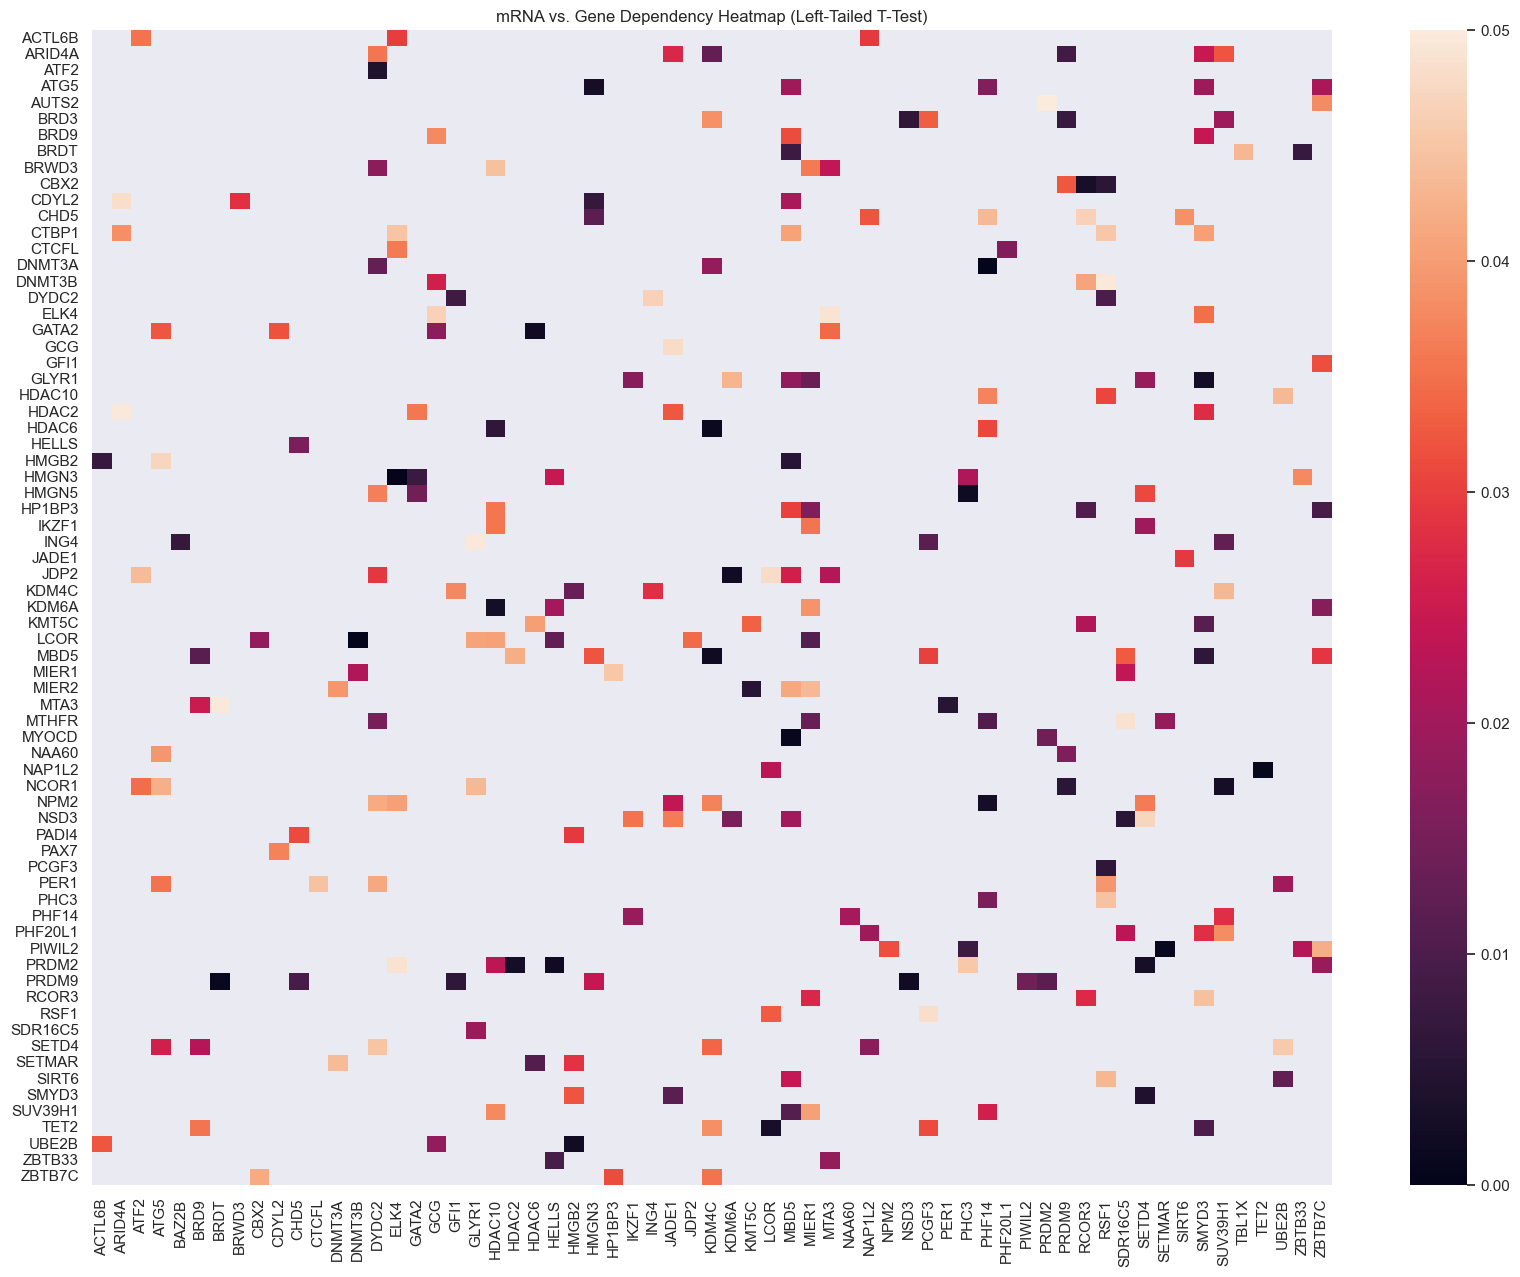

In [ ]:
# Rows that were < .05
sns.set(font_scale=1)
plt.figure(figsize=(20,15))
sns.heatmap(significant_rows_df[significant_rows_df < BONFERONNI_PVALUE].dropna(axis=0, how='all').dropna(axis=1, how='all'), vmin=0, vmax=0.05, cmap='rocket', xticklabels=True, yticklabels=True)
plt.title('mRNA vs. Gene Dependency Heatmap (Left-Tailed T-Test)')


Text(0.5, 0, 'DNMT3B mRNA Expression')

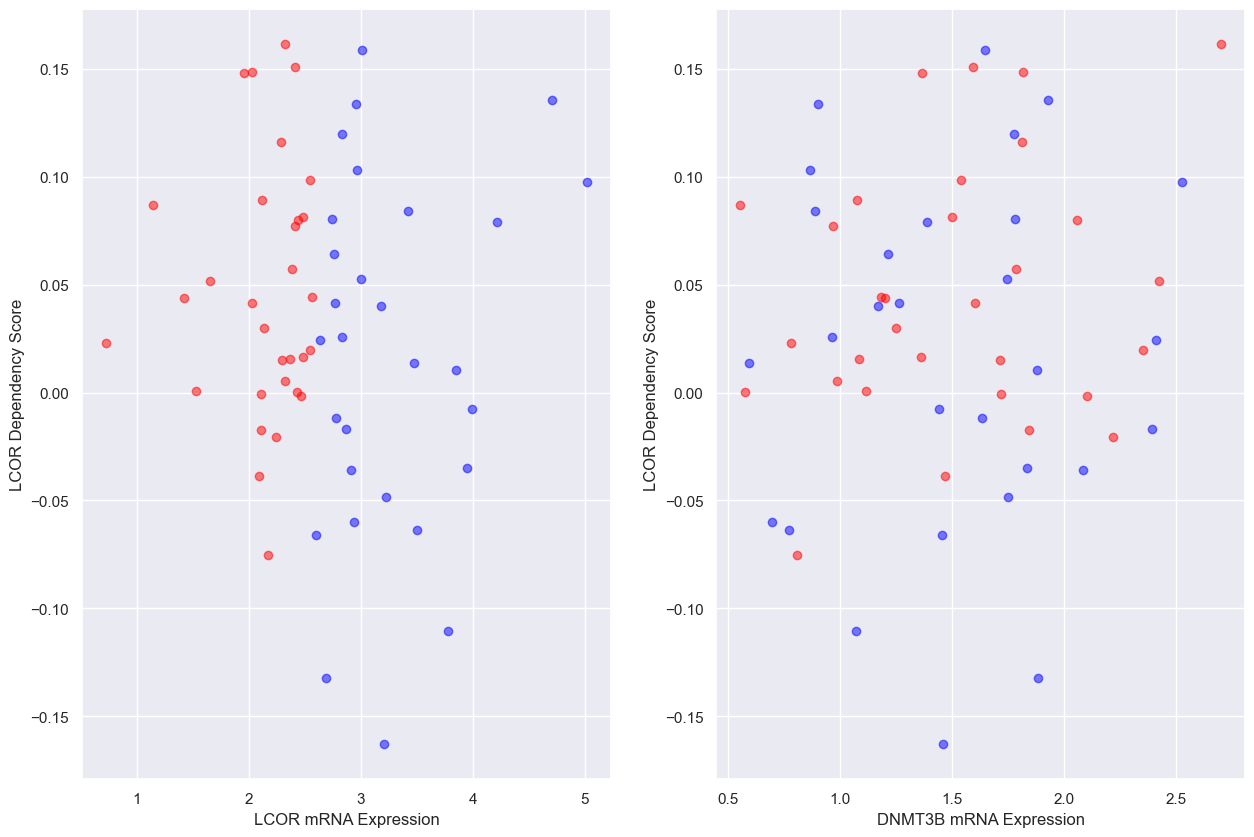

In [ ]:
w

Text(0, 0.5, 'Gene 3')

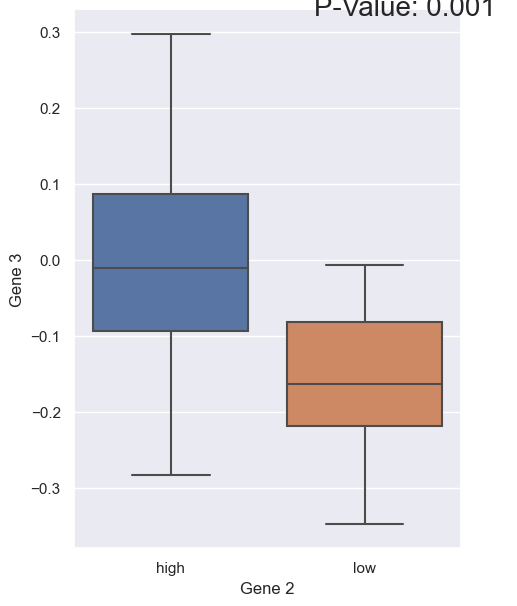

In [ ]:
plt.figure(figsize=(5,7))

sns.boxplot(x=gene_groups[gene], y=dependency_df[gene2])
# T-Test Value
plt.text(-.125, 0.375, 'P-Value: ' + str(round(ttest[1], 3)), horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes, fontsize=20)
plt.xlabel('Gene 2')
plt.ylabel('Gene 3')

##### Right Sided T-Test

In [ ]:
 # Create a Matrix of Gene x Gene
gene_effect_matrix = np.zeros((gene_groups.shape[1], gene_groups.shape[1])) 
print(gene_effect_matrix.shape)

# Iterate through the genes
# For each gene, grab the low and high expression cell lines from the gene_groups dataframe
# Iterate through the other expression cell lines and then grab the gene dependency values
# from depdenency_df, index by the index of the cell line
for gene in vip_genes:
    low_expression = gene_groups[gene_groups[gene] == 'low'].index
    high_expression = gene_groups[gene_groups[gene] == 'high'].index
    
    for gene2 in vip_genes:
        low_expression_dependency = dependency_df.loc[low_expression, gene2]
        high_expression_dependency = dependency_df.loc[high_expression, gene2]
        
        # T-Test of Gene Dependency in Low and High Expression Cells
        ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'greater')
        
        # Add the t-statistic to the gene effect matrix
        gene_effect_matrix[vip_genes[vip_genes == gene].index[0], vip_genes[vip_genes == gene2].index[0]] = ttest[1]
        
# Save
np.savetxt(save_path + 'mRNA vs. Gene Dependency Matrix.csv', gene_effect_matrix, delimiter=",")

(497, 497)


C:\Users\commo\AppData\Local\Temp\ipykernel_22688\2010492129.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'greater')
c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [ ]:
# Convert to PD
gene_effect_matrix_df = pd.DataFrame(gene_effect_matrix, columns=vip_genes, index=vip_genes)

# Remove NaN rows
gene_effect_matrix_plot = gene_effect_matrix[~np.isnan(gene_effect_matrix).any(axis=1)]

In [ ]:
BONFERONNI_PVALUE = 0.05 / gene_effect_matrix_plot.shape[0]
# Rows where the p-value is less than 0.05
significant_rows_df = gene_effect_matrix_df[gene_effect_matrix_df < BONFERONNI_PVALUE]
# Fill NAN with 1
significant_rows_df.fillna(1, inplace=True)
significant_rows_df.head(5)



,ACTB,ACTL6A,ACTL6B,AKAP8,AKAP8L,ALKBH1,APBB1,APLNR,APP,ARID1A,...,YEATS4,ZBTB33,ZBTB4,ZBTB7B,ZBTB7C,ZMPSTE24,ZMYND11,ZMYND8,ZNHIT1,ZZZ3
ACTB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTL6A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTL6B,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AKAP8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AKAP8L,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Text(0.5, 1.0, 'mRNA vs. Gene Dependency Heatmap (Right-Tailed T-Test)')

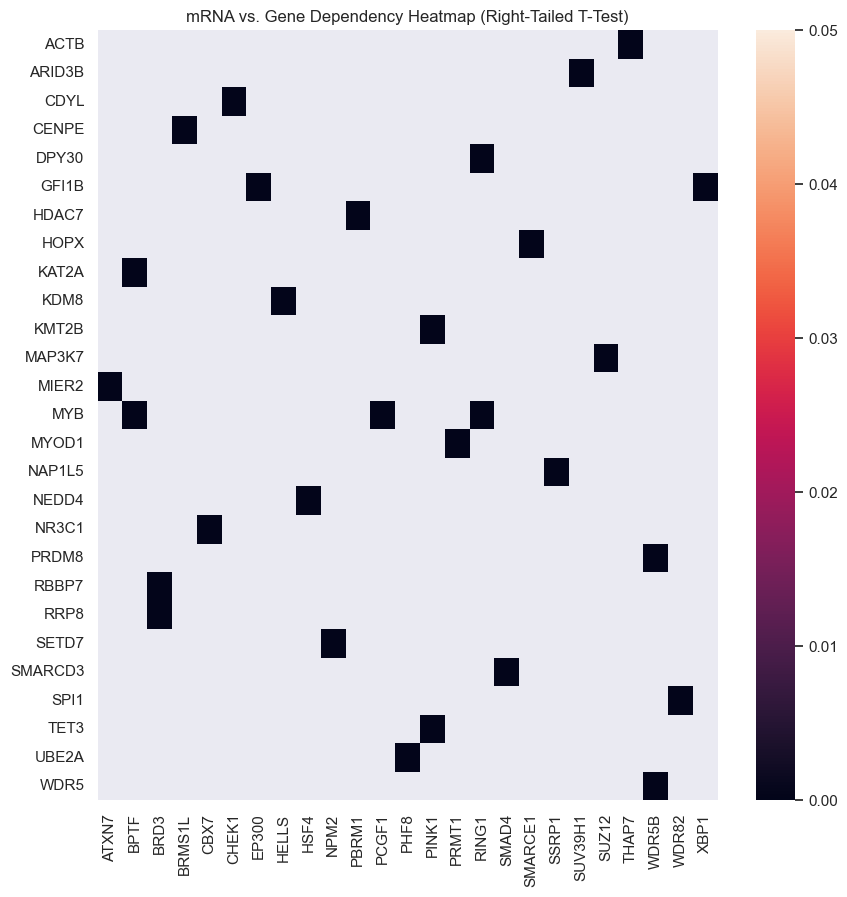

In [ ]:
# Rows that were < .05
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
significant_rows_df_filter = significant_rows_df[significant_rows_df < BONFERONNI_PVALUE].dropna(axis=0, how='all').dropna(axis=1, how='all')
sns.heatmap(significant_rows_df_filter, vmin=0, vmax=0.05, cmap='rocket', xticklabels=True, yticklabels=True)
plt.title('mRNA vs. Gene Dependency Heatmap (Right-Tailed T-Test)')


In [ ]:
# Index of the significant rows
significant_rows_df_filter.index

Index(['ACTB', 'ARID3B', 'CDYL', 'CENPE', 'DPY30', 'GFI1B', 'HDAC7', 'HOPX',
       'KAT2A', 'KDM8', 'KMT2B', 'MAP3K7', 'MIER2', 'MYB', 'MYOD1', 'NAP1L5',
       'NEDD4', 'NR3C1', 'PRDM8', 'RBBP7', 'RRP8', 'SETD7', 'SMARCD3', 'SPI1',
       'TET3', 'UBE2A', 'WDR5'],
      dtype='object')

In [ ]:
# For each column, grab the corresponding gene with a p-value < 0.05
sig_genes = []
for col in significant_rows_df_filter.columns:
    if len(significant_rows_df[col][significant_rows_df[col] < BONFERONNI_PVALUE].index) > 1:
        for gene in significant_rows_df[col][significant_rows_df[col] < BONFERONNI_PVALUE].index:
            sig_genes.append((gene, col))
    else:
        sig_genes.append((significant_rows_df[col][significant_rows_df[col] < BONFERONNI_PVALUE].index[0], col))
    
print(sig_genes)

[('MIER2', 'ATXN7'), ('KAT2A', 'BPTF'), ('MYB', 'BPTF'), ('RBBP7', 'BRD3'), ('RRP8', 'BRD3'), ('CENPE', 'BRMS1L'), ('NR3C1', 'CBX7'), ('CDYL', 'CHEK1'), ('GFI1B', 'EP300'), ('KDM8', 'HELLS'), ('NEDD4', 'HSF4'), ('SETD7', 'NPM2'), ('HDAC7', 'PBRM1'), ('MYB', 'PCGF1'), ('UBE2A', 'PHF8'), ('KMT2B', 'PINK1'), ('TET3', 'PINK1'), ('MYOD1', 'PRMT1'), ('DPY30', 'RING1'), ('MYB', 'RING1'), ('SMARCD3', 'SMAD4'), ('HOPX', 'SMARCE1'), ('NAP1L5', 'SSRP1'), ('ARID3B', 'SUV39H1'), ('MAP3K7', 'SUZ12'), ('ACTB', 'THAP7'), ('PRDM8', 'WDR5B'), ('WDR5', 'WDR5B'), ('SPI1', 'WDR82'), ('GFI1B', 'XBP1')]


IndexError: index 3 is out of bounds for axis 0 with size 3

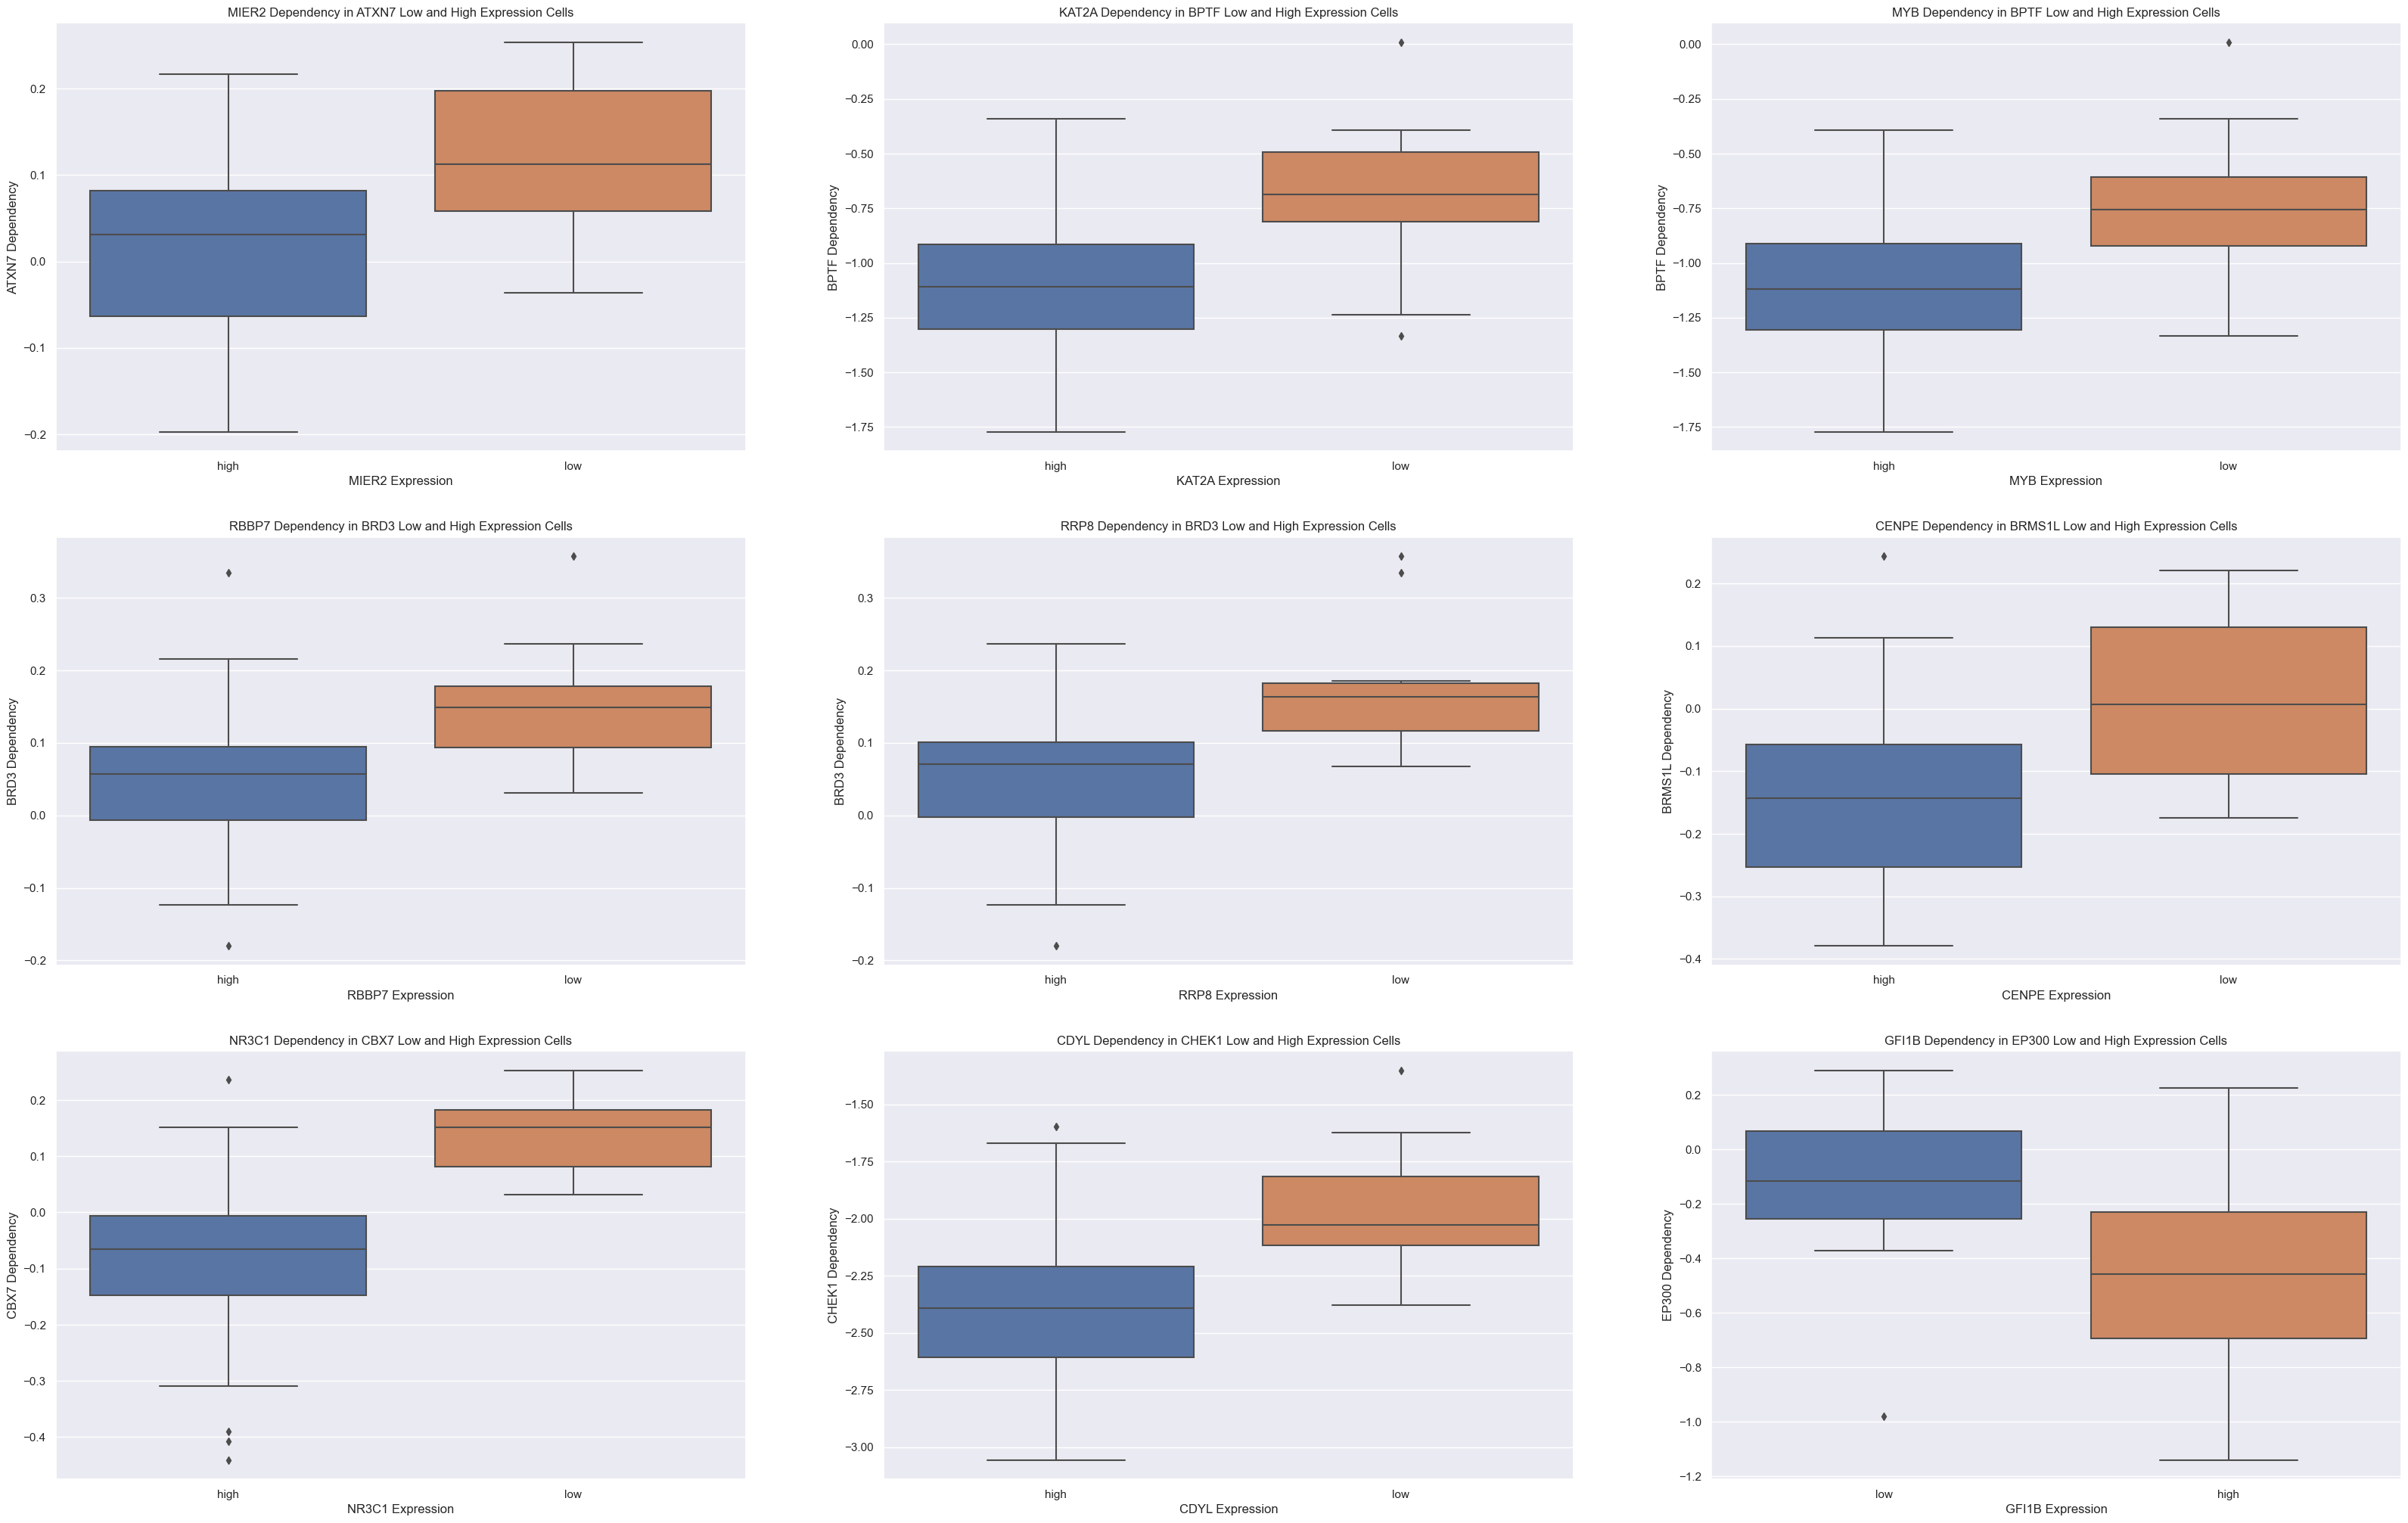

In [ ]:
# Plot the significant genes tuples in boxplots
fig, ax = plt.subplots( 3, 3, figsize=(40,25))

for i, gene in enumerate(sig_genes):
    sns.boxplot(x=gene_groups[gene[0]], y=dependency_df[gene[1]], ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(gene[0] + ' Dependency in ' + gene[1] + ' Low and High Expression Cells')
    ax[i//3, i%3].set_xlabel( gene[0] + ' Expression')
    ax[i//3, i%3].set_ylabel( gene[1] + ' Dependency')
 

(22,)
(38,)
(22,)
(38,)


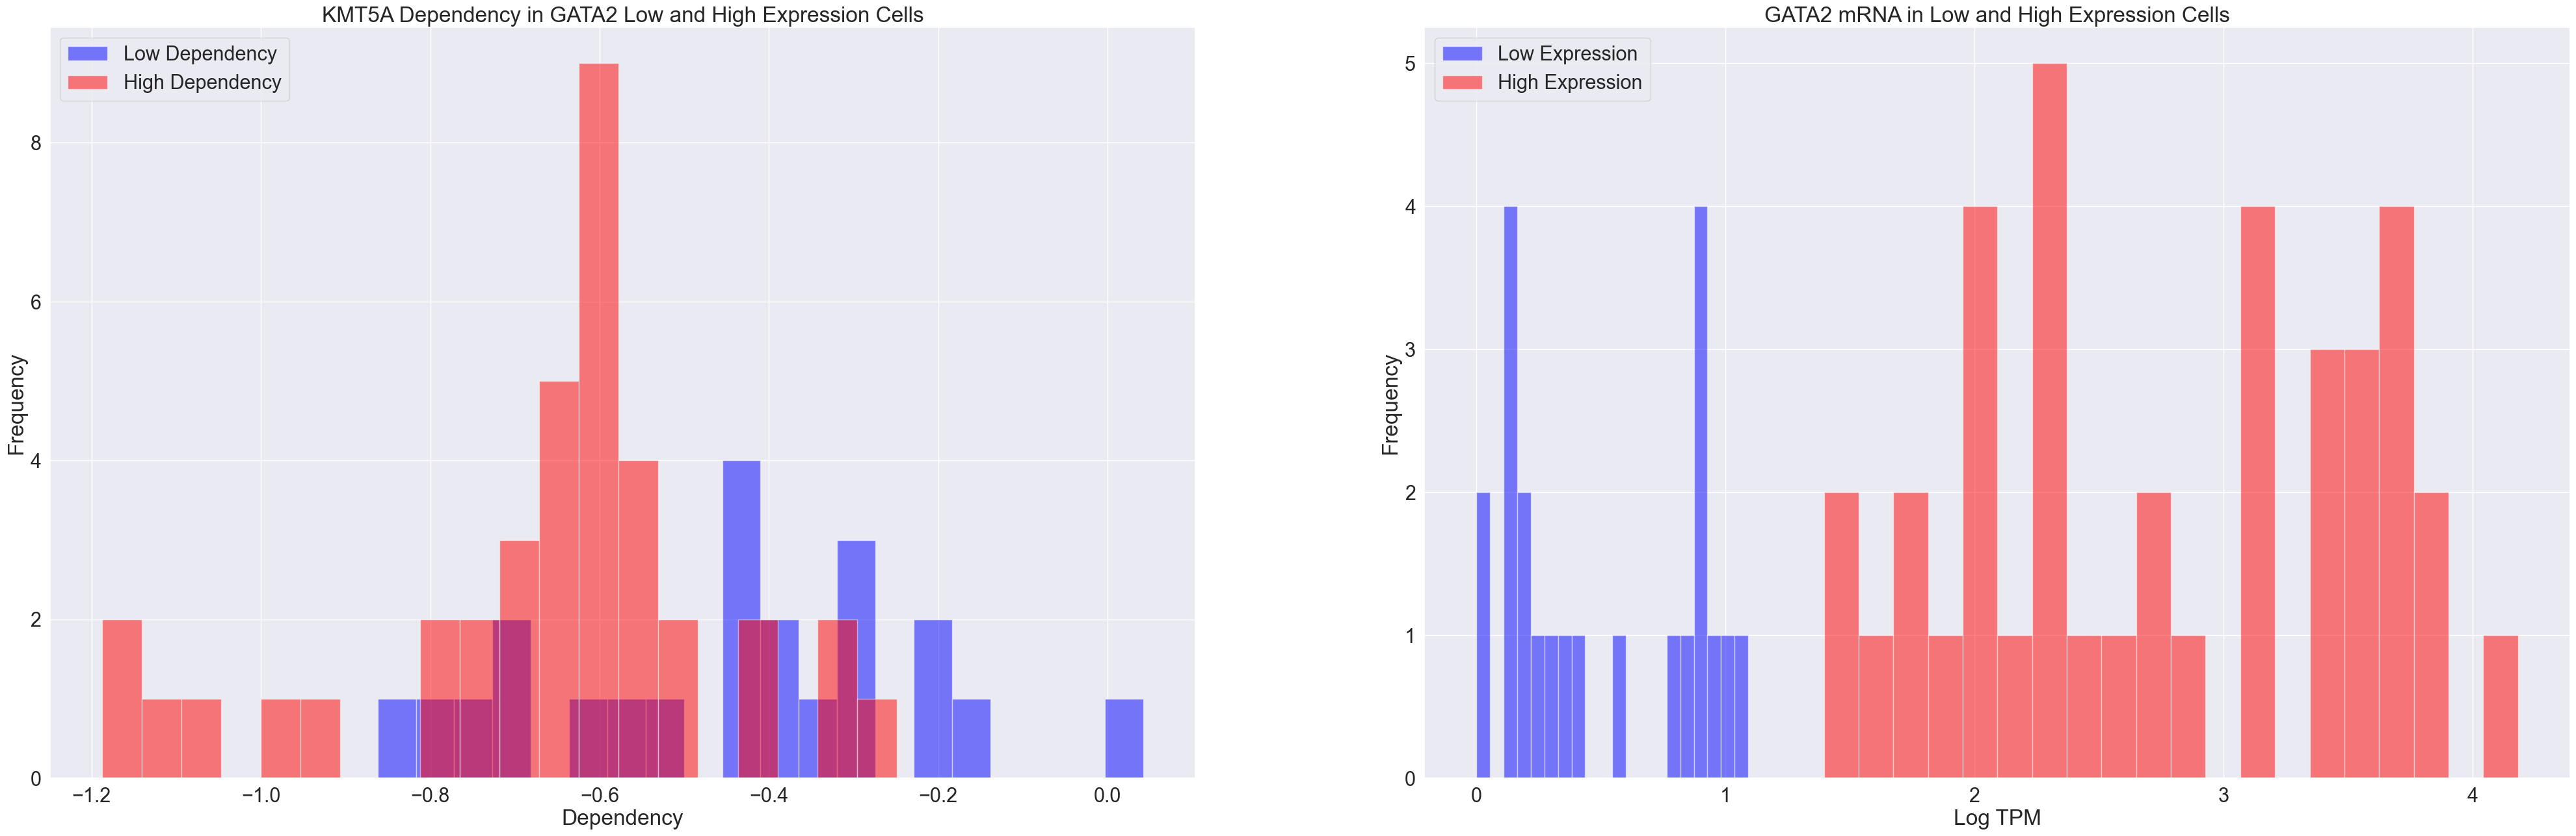

In [ ]:
# Manual Validation
gene = 'GATA2'
gene2 = 'KMT5A'
low_expression = gene_groups[gene_groups[gene] == 'low'].index
high_expression = gene_groups[gene_groups[gene] == 'high'].index


low_expression_dependency = dependency_df.loc[low_expression, gene2]
high_expression_dependency = dependency_df.loc[high_expression, gene2]


# T-Test of Gene Dependency in Low and High Expression Cells
ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'two-sided')

# Add the t-statistic to the gene effect matrix
significant_rows_df[vip_genes[vip_genes == gene].index[0], vip_genes[vip_genes == gene2].index[0]] = ttest[0]

fig,ax = plt.subplots(1,2,figsize=(50,15))

ax[0].hist(low_expression_dependency, bins=20, color='blue', alpha=0.5, label='Low Dependency')
ax[0].hist(high_expression_dependency, bins=20, color='red', alpha=0.5, label='High Dependency')
ax[0].legend(loc='upper left')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Dependency')
ax[0].set_title(gene2 + ' Dependency in ' + gene + ' Low and High Expression Cells')

# mRNA
ax[1].hist(mRNA_df.loc[low_expression, gene], bins=20, color='blue', alpha=0.5, label='Low Expression')
ax[1].hist(mRNA_df.loc[high_expression, gene], bins=20, color='red', alpha=0.5, label='High Expression')
ax[1].legend(loc='upper left')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Log TPM')
ax[1].set_title(gene + ' mRNA in Low and High Expression Cells')


print(low_expression.shape)
print(high_expression.shape)
print(low_expression_dependency.shape)
print(high_expression_dependency.shape)
    